In [1]:
import numpy as np
import averageGP, predictGP, predict

nomod = np.zeros((15, 7))
pred = np.zeros((15, 7))
predGP = np.zeros((15, 7))
averGP = np.zeros((15, 7))

nomod_ph = np.zeros(15)
pred_ph = np.zeros(15)
predGP_ph = np.zeros(15)
averGP_ph = np.zeros(15)

for i in range(3, 18):
    print ("Processing user: %d" %i)
    before, after, b_ph, a_ph = predict.run(i)
    nomod[i-3] = before
    pred[i-3] = after
    nomod_ph[i-3] = b_ph
    pred_ph[i-3] = a_ph
    
    before, after, b_ph, a_ph = predictGP.run(i)
    predGP[i-3] = after
    predGP_ph[i-3] = a_ph
    
    before, after, b_ph, a_ph = averageGP.run(i)
    averGP[i-3] = after
    averGP_ph[i-3] = a_ph

print "#########"    
print "Processing complete"    
    

Processing user: 3
Processing user: 4
Processing user: 5
Processing user: 6
Processing user: 7
Processing user: 8
Processing user: 9
Processing user: 10
Processing user: 11
Processing user: 12
Processing user: 13
Processing user: 14
Processing user: 15
Processing user: 16
Processing user: 17
#########
Processing complete


In [31]:
nomod_ph = np.array([ 25.1151859,   18.07938028,  26.50051007,  11.66788854,   8.06321751,
  13.64423356,  24.32307367,  15.76499372,   8.98525962,  20.62505426,
  20.08021388,  18.82491833,  22.09510628,  18.82148032,  24.1107871 ])
pred_ph = np.array([ 25.0524641,  13.44048009,  27.31421756,  13.00833735,  11.3652323,
   8.74228304,  29.27470334,  10.96036949,   9.45247536,  19.84057501,
  15.91967363,  17.56717399,  20.58920024,  16.12536741,  19.5619407 ])
predGP_ph = np.array([ 25.27234809,  13.13360834,  28.31604499, 13.13868254,  11.61310361,
   8.39933263,  28.95603516,  11.12571365,   9.20357628,  18.83323855,
  16.37772468,  16.49212057,  20.32634511,  19.21634542,  18.76223359])
averGP_ph = np.array([ 23.46154777,  10.37287213,  27.81063562,  11.58030513,   9.89885981,
   7.96784661,  27.16622537,  10.89598749,   9.5905824,   18.05696488,
  15.56614042,  16.06233505,  20.19400352,  15.18062735,  20.61999556])

print np.mean(nomod_ph)
print np.mean(pred_ph)
print np.mean(predGP_ph)
print np.mean(averGP_ph)

18.446753536
17.214299574
17.2777635473
16.294995274


In [131]:
print np.mean(nomod[:,1])
print np.mean(pred[:,1])
print np.mean(predGP[:,1])
print np.mean(averGP[:,1])

53.0770997796
44.2987457235
44.6111334329
43.075058759


In [40]:
from scipy import stats

print stats.ttest_rel(nomod_ph, averGP_ph)

(2.7800548577404736, 0.014747793637793553)


13.644233556
8.74228304199
8.39933263434
7.96784660703


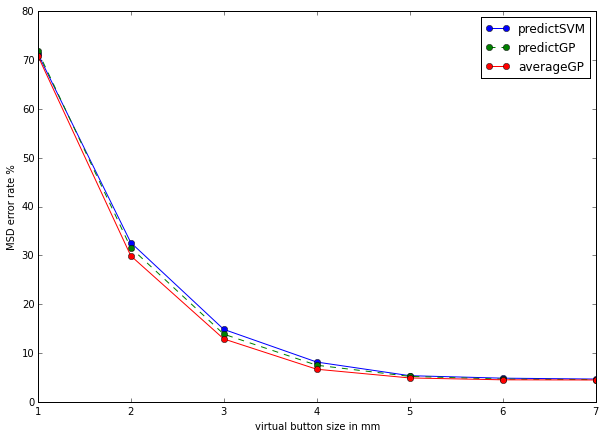

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

userId = 8

fig = plt.figure(figsize=(10, 7))

print nomod_ph[userId -3]
print pred_ph[userId -3]
print predGP_ph[userId -3]
print averGP_ph[userId -3]

plt.errorbar(range(1,8), pred[userId -3], marker="o", label = "predictSVM")
#plt.errorbar(range(1,8), nomod[userId -3], linestyle="--", marker="o", label="no model")
plt.errorbar(range(1,8), predGP[userId -3], linestyle="--", marker="o", label = "predictGP")
plt.errorbar(range(1,8), averGP[userId -3], linestyle="-", marker="o", label="averageGP")

plt.legend(loc='best')
plt.xlabel('virtual button size in mm')
plt.ylabel('MSD error rate %')
#plt.savefig('/users/level5/1005056p/Desktop/Latex/L5Project/mpaper/img/compare_msd4.png', bbox_inches='tight', dpi=400)
plt.show()